# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `dataproject.py` file includes a function which will be used multiple times in this notebook.

Imports and set magics:

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas_datareader as pddr
from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

## Employment data

**Read the exchange rate data** in ``VALUTAKURSER.xls`` and **clean it** removing and renaming columns:

In [238]:
# a. load
er = pd.read_excel('VALUTAKURSER.xls', skiprows=3, index_col=0)

# b. drop columns
#drop_these = ['Indicator Name', 'Indicator Code']
#er.drop(drop_these, axis=1, inplace=True)
er.drop(er.loc[:, 'Indicator Name':'1998'].columns, axis = 1, inplace=True)
er.drop(['2019'], axis=1, inplace=True)

# c. rename columns
er.rename(columns = {'Country Code':'Country_Code'}, inplace=True)

The dataset now looks like this:

In [239]:
er.head(9)

,Country_Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,...,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000
Afghanistan,AFG,46.619531,47.357575,47.500015,47.263000,48.762754,47.845312,49.494597,49.925331,49.962018,...,50.325000,46.452461,46.747008,50.921400,55.377500,57.247500,61.143462,67.866086,68.026904,72.083247
Angola,AGO,2.790706,10.040544,22.057862,43.530207,74.606301,83.541363,87.159142,80.368072,76.706143,...,79.328167,91.905720,93.934750,95.467955,96.518279,98.302417,120.060702,163.656434,165.915951,252.855748
Albania,ALB,137.690583,143.709417,143.484833,140.154516,121.863250,102.780051,99.870254,98.103377,90.427894,...,94.978120,103.936667,100.895833,108.184167,105.669167,105.480000,125.961667,124.142500,119.100000,107.989167
Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United Arab Emirates,ARE,3.672500,3.672500,3.672500,3.672500,3.672500,3.672500,3.672500,3.672500,3.672500,...,3.672500,3.672500,3.672500,3.672500,3.672500,3.672500,3.672500,3.672500,3.672500,3.672500
Argentina,ARG,0.999500,0.999500,0.999500,3.063257,2.900629,2.923301,2.903658,3.054313,3.095649,...,3.710107,3.896295,4.110140,4.536934,5.459353,8.075276,9.233186,14.758175,16.562707,28.094992
Armenia,ARM,535.061833,539.525833,555.078258,573.353333,578.762955,533.450833,457.686941,416.040370,342.079116,...,363.283286,373.660467,372.500882,401.763976,409.625749,415.919789,477.918307,480.488151,482.716394,482.987947


**Remove all rows which are not municipalities**:

In [240]:
c_list = ['Brazil','China', 'Euro area', 'United Kingdom', 'India', 'Japan', 'South Africa', 'Russian Federation', 'United States']
er2 = er.loc[c_list,]
er2.head(9)

,Country_Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Brazil,BRA,1.813933,1.829423,2.349632,2.920363,3.077475,2.925119,2.434390,2.175327,1.947058,...,1.999428,1.759227,1.672829,1.953069,2.156089,2.352952,3.326904,3.491313,3.191389,3.653825
China,CHN,8.278250,8.278504,8.277068,8.276957,8.277037,8.276801,8.194317,7.973438,7.607532,...,6.831416,6.770269,6.461461,6.312333,6.195758,6.143434,6.227489,6.644478,6.758755,6.615957
Euro area,EMU,0.938283,1.082705,1.116533,1.057559,0.884048,0.803922,0.803800,0.796433,0.729672,...,0.716958,0.754309,0.718414,0.778338,0.752945,0.752728,0.901296,0.903421,0.885206,0.846773
United Kingdom,GBR,0.618057,0.660931,0.694655,0.667223,0.612472,0.546180,0.549998,0.543487,0.499772,...,0.641919,0.647179,0.624141,0.633047,0.639661,0.607730,0.654545,0.740634,0.776977,0.749532
India,IND,43.055428,44.941605,47.186414,48.610319,46.583284,45.316467,44.099975,45.307008,41.348533,...,48.405267,45.725812,46.670467,53.437233,58.597845,61.029514,64.151944,67.195313,65.121569,68.389467
Japan,JPN,113.906805,107.765498,121.528948,125.388019,115.933464,108.192569,110.218212,116.299312,117.753529,...,93.570089,87.779875,79.807020,79.790455,97.595658,105.944781,121.044026,108.792900,112.166141,110.423179
South Africa,ZAF,6.109484,6.939828,8.609181,10.540747,7.564749,6.459693,6.359328,6.771549,7.045365,...,8.473674,7.321222,7.261132,8.209969,9.655056,10.852656,12.758931,14.709611,13.323801,13.233926
Russian Federation,RUS,24.619900,28.129167,29.168525,31.348483,30.692025,28.813742,28.284442,27.190958,25.580845,...,31.740358,30.367915,29.382341,30.839831,31.837144,38.378207,60.937650,67.055933,58.342801,62.668133
United States,USA,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Convert the dataset to long format**:

In [241]:
#a. rename year columns
mydict = {str(i):f'Exchange rate{i}' for i in range(1999,2019)}
er2.rename(columns = mydict, inplace=True)

# b. convert to long
er2_long = pd.wide_to_long(er2, stubnames = 'Exchange rate', i='Country_Code', j='year').reset_index()

# c. show
er2_long.head(1000)

,Country_Code,year,Exchange rate
0,BRA,1999,1.813933
1,CHN,1999,8.278250
2,EMU,1999,0.938283
3,GBR,1999,0.618057
4,IND,1999,43.055428
...,...,...,...
175,IND,2018,68.389467
176,JPN,2018,110.423179
177,ZAF,2018,13.233926
178,RUS,2018,62.668133


## Income data

**Read the income data** in ``BNPVÆKST.xls`` and **clean it**:

In [243]:
# a. load
gdpg = pd.read_excel('BNPVÆKST.xls', skiprows=3, index_col=0)

# b. drop and rename columns
#gdpg.drop(drop_these, axis=1, inplace=True)
gdpg.drop(gdpg.loc[:, 'Indicator Name':'1998'].columns, axis = 1, inplace=True)
gdpg.drop(['2019'], axis=1, inplace=True)
gdpg.rename(columns = {'Country Code':'Country_Code'}, inplace=True)
# d. remove non-municipalities
#inc = dataproject.only_keep_municipalities(inc)

gdpg2 = gdpg.loc[c_list,]
gdpg2.head(9)

# e. convert to long
gdpg2.rename(columns = {str(i):f'GDP growth{i}' for i in range(1999,2019)}, inplace=True)

gdpg2_long = pd.wide_to_long(gdpg2, stubnames='GDP growth', i='Country_Code', j='year').reset_index()

# f. show
gdpg2_long.head(1000)

,Country_Code,year,GDP growth
0,BRA,1999,0.467938
1,CHN,1999,7.667486
2,EMU,1999,2.975615
3,GBR,1999,3.428223
4,IND,1999,8.845756
...,...,...,...
175,IND,2018,6.811369
176,JPN,2018,0.788456
177,ZAF,2018,0.787056
178,RUS,2018,2.254804


> **Note:** The function ``dataproject.only_keep_municipalities()`` is used on both the employment and the income datasets.

## Explore data set

In order to be able to **explore the raw data**, we here provide an **interactive plot** to show, respectively, the employment and income level in each municipality

The **static plot** is:

In [244]:
def plot_er_gdpg(er2,gdpg2,dataset, Country_Code): 
    
    if dataset == 'Exchange rate':
        df = er2
        y = 'Exchange rate'
    else:
        df = gdpg2
        y = 'GDP growth'
    
    I = df['Country_Code'] == Country_Code
    ax = df.loc[I,:].plot(x='year', y=y, style='-o')

The **interactive plot** is:

In [254]:
widgets.interact(plot_er_gdpg, 
    
    er2 = widgets.fixed(er2_long),
    gdpg2 = widgets.fixed(gdpg2_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['Exchange rate','GDP growth']),
    Country_Code = widgets.Dropdown(description='Country_Code',
                 options=er2_long.Country_Code.unique())
); 

plt.show()

interactive(children=(Dropdown(description='Dataset', options=('Exchange rate', 'GDP growth'), value='Exchange…

ADD SOMETHING HERE IF THE READER SHOULD KNOW THAT E.G. SOME MUNICIPALITY IS SPECIAL.

# Merge data sets

We now create a data set with **municpalities which are in both of our data sets**. We can illustrate this **merge** as:

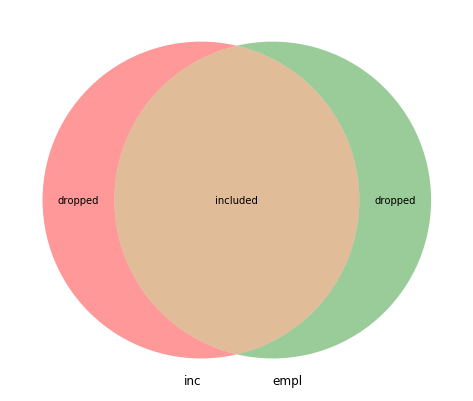

In [255]:
plt.figure(figsize=(16,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('inc', 'empl'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

In [ ]:
merged = pd.merge(empl_long, inc_long, how='inner',on=['municipality','year'])

print(f'Number of municipalities = {len(merged.municipality.unique())}')
print(f'Number of years          = {len(merged.year.unique())}')

# Analysis

To get a quick overview of the data, we show some **summary statistics by year**:

In [ ]:
merged.groupby('year').agg(['mean','std']).round(2)

ADD FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.